<a href="https://colab.research.google.com/github/gtsagkatakis/FOMO2024_code/blob/main/train_cnn_VVBs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!rm -r FOMO2024_code
# Clone the repository
!git clone https://github.com/gtsagkatakis/FOMO2024_code

Cloning into 'FOMO2024_code'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 5.78 MiB | 31.00 MiB/s, done.


In [21]:
import zipfile
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Specify the name of your ZIP file
zip_file = '/content/FOMO2024_code/15classes_split_20trainperclass.zip'

# Create a directory to extract the contents
extract_dir = 'dataset'

# Unzip the file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify the extraction
os.listdir(extract_dir)


['15classes_split_20trainperclass']

In [12]:
# Step 1: Define the directories for training and testing datasets
train_data_dir = '/content/dataset/15classes_split_20trainperclass/train'
test_data_dir = '/content/dataset/15classes_split_20trainperclass/test'



In [13]:
# Step 2: Load the training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    image_size=(128, 128),  # Resize all images to 128x128
    batch_size=32,          # Use a batch size of 32
    label_mode='int',       # Labels are encoded as integers
    shuffle=True            # Shuffle the data
)

Found 300 files belonging to 15 classes.


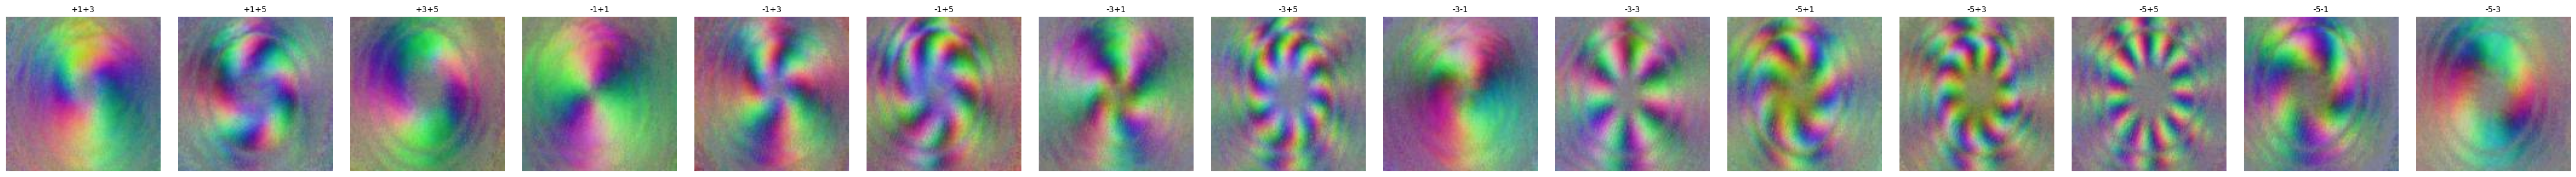

In [27]:
batch_size = 32
img_size = (128, 128)

# Step 1: Extract class names from the dataset
class_names = train_dataset.class_names

# Step 2: Initialize dictionary to track whether an image for each class has been shown
images_shown = {class_name: False for class_name in class_names}

# Step 3: Create a figure with one subplot per class
num_classes = len(class_names)
fig, axes = plt.subplots(1, num_classes, figsize=(num_classes * 3, 3))

# Step 4: Iterate over the dataset and show one image per class
for images, labels in train_dataset.unbatch():
    class_idx = labels.numpy()
    class_name = class_names[class_idx]

    # If an image from this class hasn't been shown yet, display it
    if not images_shown[class_name]:
        ax = axes[class_idx]
        ax.imshow(images.numpy().astype("uint8"))
        ax.axis('off')
        ax.set_title(class_name, size=10)
        images_shown[class_name] = True

    # Break the loop once all classes have an image displayed
    if all(images_shown.values()):
        break

plt.tight_layout()
plt.show()

In [14]:

# Step 3: Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(128, 128, 3)),  # Normalize pixel values
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),         # First convolutional layer
    tf.keras.layers.MaxPooling2D(),                               # First max pooling layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),         # Second convolutional layer
    tf.keras.layers.MaxPooling2D(),                               # Second max pooling layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),        # Third convolutional layer
    tf.keras.layers.MaxPooling2D(),                               # Third max pooling layer
    tf.keras.layers.Flatten(),                                    # Flatten the output
    tf.keras.layers.Dense(128, activation='relu'),                # Fully connected layer
    tf.keras.layers.Dense(15, activation='softmax')               # Output layer (15 classes)
])

In [15]:
# Step 4: Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [16]:
# Step 5: Train the model
history = model.fit(
    train_dataset,
    epochs=10  # Adjust the number of epochs based on your needs
)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 993ms/step - accuracy: 0.0937 - loss: 2.7809
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 889ms/step - accuracy: 0.2920 - loss: 2.2737
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 794ms/step - accuracy: 0.7189 - loss: 0.9688
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 966ms/step - accuracy: 0.8494 - loss: 0.4696
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 954ms/step - accuracy: 0.9090 - loss: 0.3358
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 804ms/step - accuracy: 0.9402 - loss: 0.1666
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 815ms/step - accuracy: 0.9890 - loss: 0.0709
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 972ms/step - accuracy: 0.9839 - loss: 0.0445
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 970ms/step - accuracy: 0.9935 - loss: 0.0267
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 792ms/step - accuracy: 0.9916 - loss: 0.0248


In [17]:
# Step 6: Load the test dataset



test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    image_size=(128, 128),  # Resize all images to 128x128
    batch_size=32,          # Use a batch size of 32
    label_mode='int',       # Labels are encoded as integers
    shuffle=False           # Do not shuffle the test data
)


Found 1668 files belonging to 15 classes.


In [18]:
# Step 7: Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 287ms/step - accuracy: 0.9370 - loss: 0.3132
Test Accuracy: 92.09%
